<h1 align='center' style='color:purple'>Clustering With K Means - Python</h1>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/mushrooms - mushrooms.xls")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,NaN,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [ ]:
df["class"]=df["class"].map({'p':0,'e':1})

In [ ]:
df["cap-shape"].unique()

array(['x', 'b', nan, 's', 'f', 'k', 'c'], dtype=object)

In [ ]:

df["cap-shape"]=df["cap-shape"].map({'x':0, 'b':1, 's':2, 'f':3, 'k':4, 'c':5})

In [ ]:
df["cap-surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [ ]:
df["cap-surface"]=df["cap-surface"].map({'s':0, 'y':1, 'f':2, 'g':3})

#function to replace the column values with the numerical values

In [ ]:
from pandas.core.strings.accessor import str_extractall
def numerizecolumns(name,df):
  dict={}
  listt=list(df[str(name)].unique())
  print(listt)
  for i in listt:
    # print("i values is :"+str(i))
    for j in range(0,len(listt)):
      # print("j values is "+str(j))
      if j not in dict.values():
        # print("j value adding is"+str(j))
        dict.update({str(i):j})
  df[str(name)]=df[str(name)].map(dict)
  print(dict)


numerizecolumns("City",df)

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,0.0,0,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,1.0,0,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,0.0,1,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,NaN,0,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4.0,0,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,1,0.0,0,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,1,3.0,0,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,0,4.0,1,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df["cap-color"].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [ ]:
df["cap-color"]=df["cap-color"].map({'n':0, 'y':1, 'w':2, 'g':3, 'e':4, 'p':5, 'b':6, 'u':7, 'c':8, 'r':9})

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0,0,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,0.0,0,1,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,1.0,0,2,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,0.0,1,2,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,NaN,0,3,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4.0,0,0,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,1,0.0,0,0,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,1,3.0,0,0,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,0,4.0,1,0,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df["bruises"].unique()

array(['t', 'f'], dtype=object)

In [ ]:
df["bruises"]=df["bruises"].map({'t':0, 'f':1})

In [ ]:
df["odor"].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [ ]:
df["odor"]=df["odor"].map({'p':0, 'a':1, 'l':2, 'n':3, 'f':4, 'c':5, 'y':6, 's':7, 'm':8})

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0,0,0,0,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,0.0,0,1,0,1,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,1.0,0,2,0,2,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,0.0,1,2,0,0,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,NaN,0,3,1,3,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4.0,0,0,1,3,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,1,0.0,0,0,1,3,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,1,3.0,0,0,1,3,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,0,4.0,1,0,1,6,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.to_csv("/content/processed-mushrooms - mushrooms.csv")

Text(0, 0.5, 'Odor')

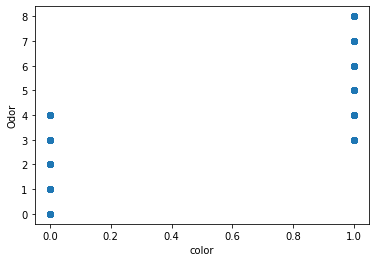

In [ ]:
plt.scatter(df["bruises"],df['odor'])
plt.xlabel('color')
plt.ylabel('Odor')

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['bruises','odor']])
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[0.49940688, 3.02846975],
       [1.        , 6.33043478]])

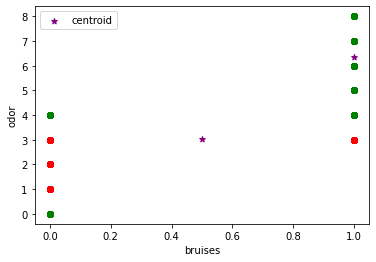

In [ ]:
df1 = df[df["class"]==0]
df2 = df[df["class"]==1]
plt.scatter(df1["bruises"],df1['odor'],color='green')
plt.scatter(df2["bruises"],df2['odor'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('bruises')
plt.ylabel('odor')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['odor']])
df['odor'] = scaler.transform(df[['odor']])

scaler.fit(df[['bruises']])
df['bruises'] = scaler.transform(df[['bruises']])

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0,0,0.0,0.000,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,0.0,0,1,0.0,0.125,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,1.0,0,2,0.0,0.250,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,0.0,1,2,0.0,0.000,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,NaN,0,3,1.0,0.375,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


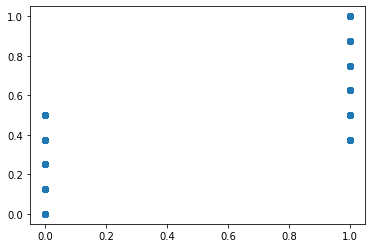

In [ ]:
plt.scatter(df["bruises"],df['odor'])

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['bruises','odor']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# df['cluster']=y_predicted
# df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
km.cluster_centers_

array([[1.00000000e+00, 5.45282224e-01],
       [5.66213743e-15, 3.12796209e-01]])

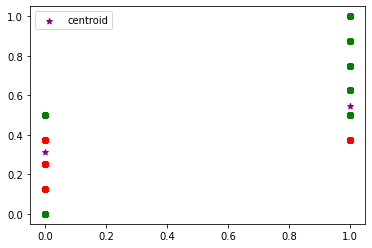

In [ ]:
df1 = df[df["class"]==0]
df2 = df[df["class"]==1]
plt.scatter(df1["bruises"],df1['odor'],color='green')
plt.scatter(df2["bruises"],df2['odor'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['bruises','odor']])
    sse.append(km.inertia_)

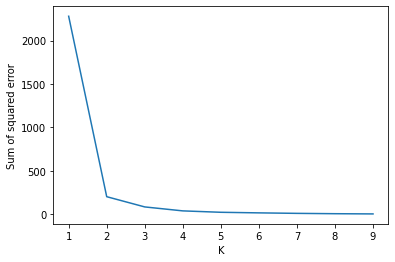

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)